In [15]:
# Libraries needed for appropiate working of the functions developed.

import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from os import listdir, path
%matplotlib inline

imagesnames = sorted(listdir('images'))   

print(sorted(imagesnames))

['blurry_moon.png']


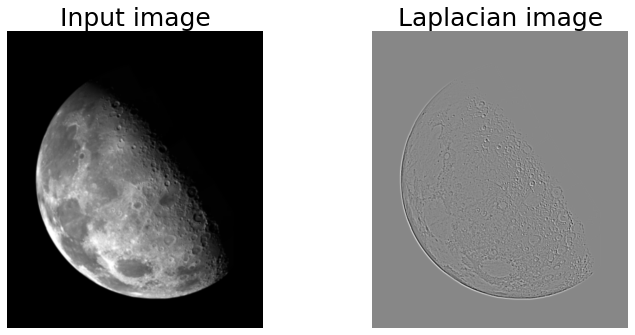

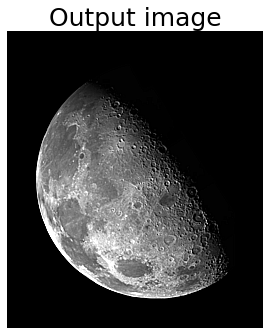

In [16]:
#Define Function

# Laplacian kernal
def Laplacian(img): 
    kernel_V = np.array([[1,1,1],[1,-8,1],[1,1,1]],dtype=np.float32) 
    imgVL = cv2.filter2D(img,-1,kernel_V)  
    imgSubV=img-imgVL 
    #imgSubV_K=Subtraction_Lap(img)
    return [imgVL,imgSubV]  

#Load images
img = cv2.imread ('images/blurry_moon.png',cv2.IMREAD_GRAYSCALE).astype("float32") #Read original image

#Call functions
LaplacianV, subtractionV= Laplacian(img)

#Plotting
plt.figure(figsize=(12,12)); 
plt.subplot(2,2,1);plt.imshow(img, cmap='gray');plt.title("Input image",fontsize=25);plt.axis('off')          
plt.subplot(2,2,2);plt.imshow(LaplacianV,cmap='gray');plt.title("Laplacian image",fontsize=25);plt.axis('off')    
     
plt.figure(figsize=(12,12)); 
plt.subplot(2,2,1); plt.imshow(subtractionV, cmap='gray', vmin=0, vmax=255);plt.title("Output image",fontsize=25);plt.axis('off')          

plt.show()